In [1]:
import numpy as np
from scipy import fft
from matplotlib import pyplot as plt
from IPython.display import Audio
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

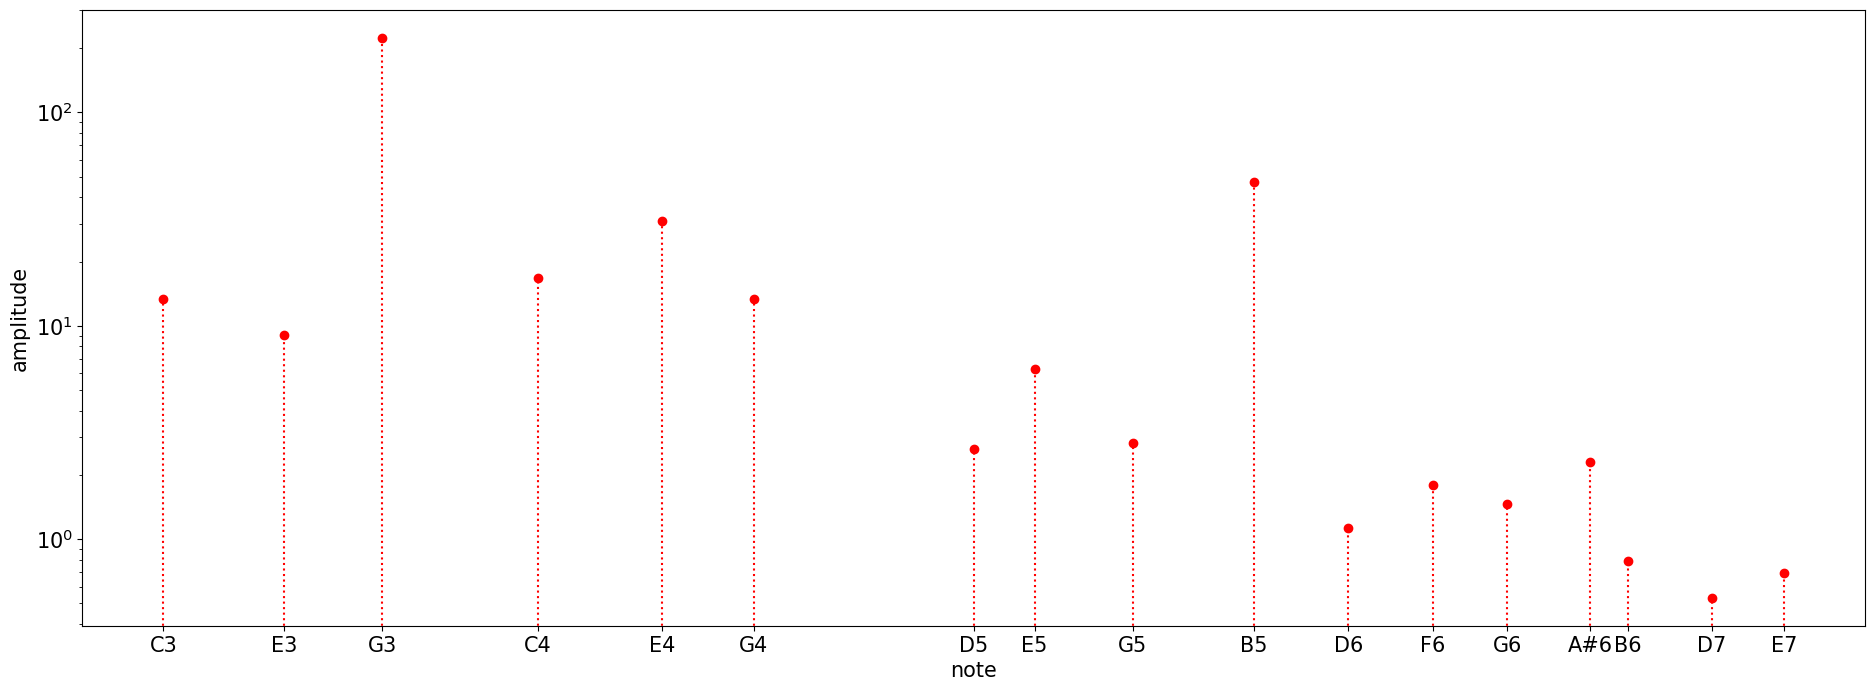

In [2]:
note = [
     "C3",  "E3",  "G3",  "C4",  "E4",   "G4",   "D5",   "E5",   "G5",
     "B5",  "D6",  "F6",  "G6", "A#6",   "B6",   "D7",   "E7",
]
frequency = [ # in Hz
    132.3, 165.4, 198.4, 264.6,   333,  394.7,  593.1,  663.7,   796, 
    996.7,  1186,  1387,  1592,  1857,   1991,   2324,   2657
]
amplitude = [
    13.28, 9.081, 223.6, 16.71, 30.98,  13.28,  2.633,  6.258, 2.815, 
    46.93, 1.125, 1.797, 1.458, 2.295, 0.7868, 0.5319, 0.6912
]

plt.figure(figsize=[23, 8])
ax = plt.subplot()
plt.loglog(frequency, amplitude, "or")
for x, y in zip(frequency, amplitude):
    plt.loglog([x, x], [0, y], ":r")
plt.xlabel("note")
plt.ylabel("amplitude")
plt.xticks(frequency, note)
ax.tick_params(axis='x', which='minor', bottom=False)
plt.savefig("example_DO.pdf")

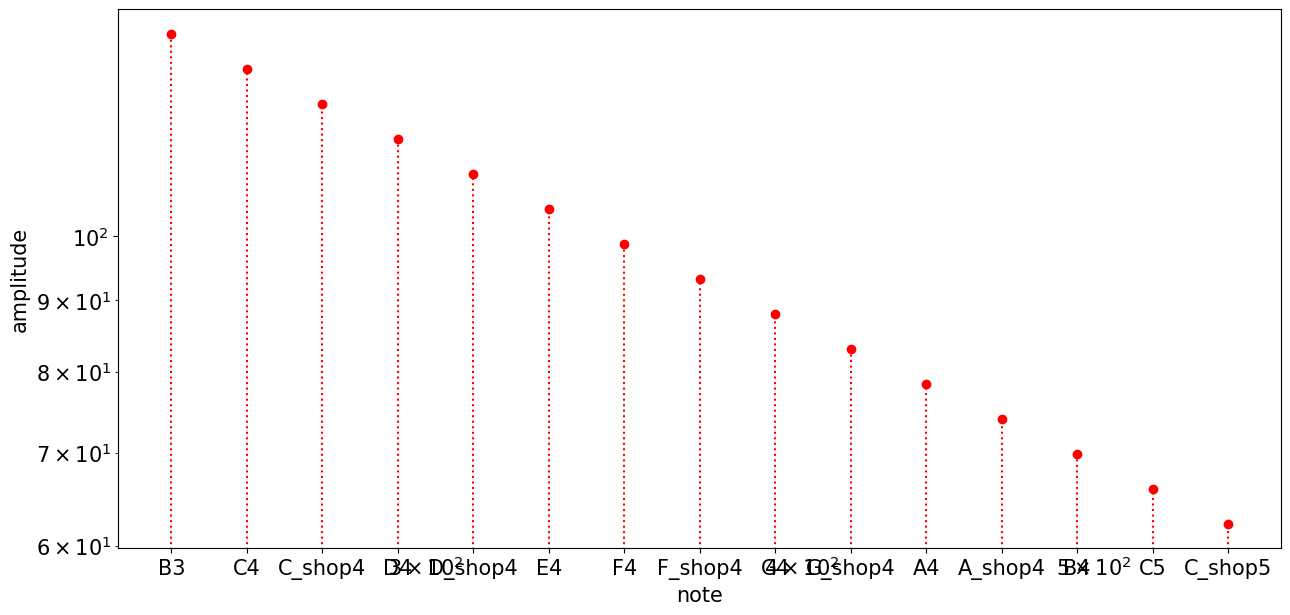

In [45]:
note = ["B3", "C4", "C_shop4", "D4", "D_shop4", "E4", "F4", "F_shop4", "G4", 
        "G_shop4", "A4", "A_shop4", "B4", "C5", "C_shop5",
        
]
frequency = [ # in Hz
    246.94, 261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392.00, 
    415.30, 440.00, 466.16, 493.88, 523.25, 554.37
]
amplitude = [
    139.71, 131.87, 124.47, 117.48, 110.89, 104.66, 98.79, 93.24, 88.01, 
    83.07, 78.41, 74.01, 69.85, 65.93,62.23
    
]

plt.figure(figsize=[15, 7])
ax = plt.subplot()
plt.loglog(frequency, amplitude, "or")
for x, y in zip(frequency, amplitude):
    plt.loglog([x, x], [0, y], ":r")
plt.xlabel("note")
plt.ylabel("amplitude")
plt.xticks(frequency, note)
ax.tick_params(axis='x', which='minor', bottom=False)

plt.savefig("B3_to_Cshop5_Figure1.pdf")

In [37]:
wave

array([ 65.75016412,  12.18317952, -26.56142036, ..., 282.10073884,
       308.25988732, 347.59555306])

In [4]:
# number of samples per second, i.e., 1/Δt
sampling_frequency = 48000 // 8

# then, maximum frequency that can be resolved
max_freq = 0.5 * sampling_frequency

# discrete time domain
max_time = 1 # in seconds
time = np.linspace(0, max_time, sampling_frequency * max_time + 1)[:-1]

# random phases for different notes
phase = np.random.rand(len(time)) * 2*np.pi

# wave samples
wave  = sum(A * np.cos(2*np.pi*f*time + ph) 
            for A, f, ph in zip(amplitude, frequency, phase))

In [34]:
Audio(wave, rate=sampling_frequency)

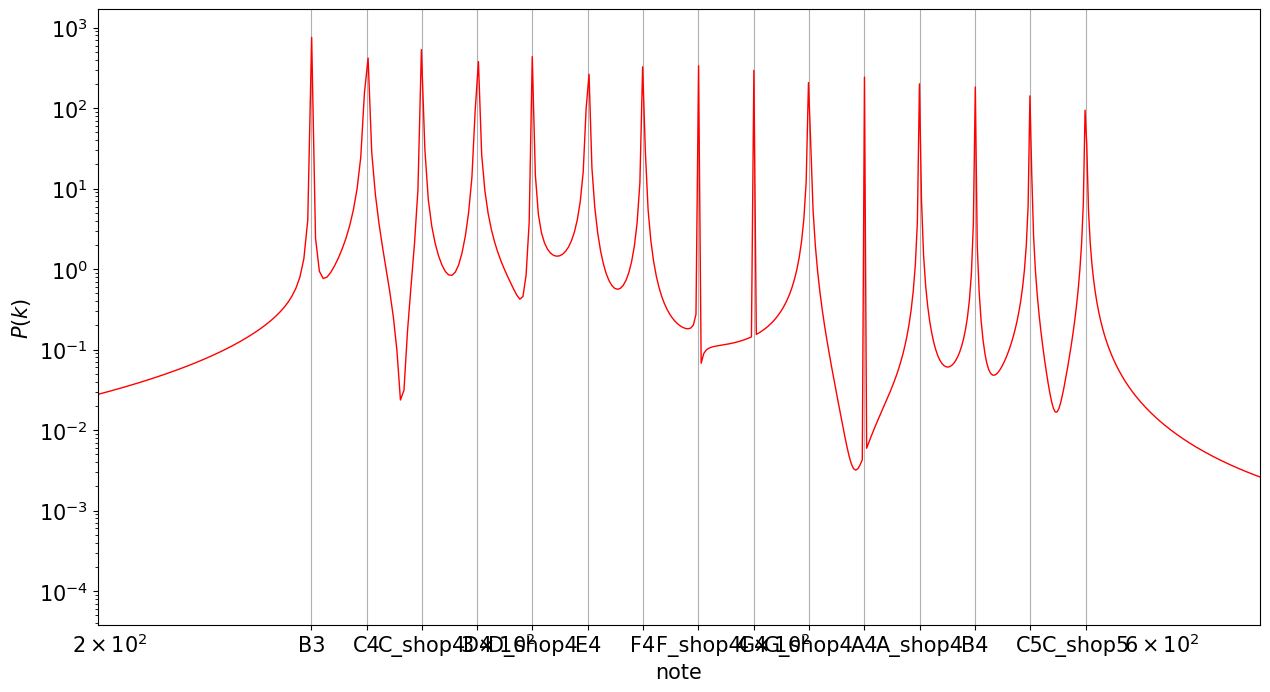

In [46]:
Wj = fft.fft(wave)
N  = len(Wj)

Dk = 2*np.pi / (max(time) - min(time))
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * Dk

# kj is 'angular' frequency.
# divide it by 2pi to convert to frequency in Hz
fj = kj / (2*np.pi)

# power spectral density
Pj = np.abs(Wj/N)**2 / Dk

plt.figure(figsize=[15, 8])
ax = plt.subplot()
plt.loglog(fj[:int(N/2)], Pj[:int(N/2)], "-r", lw=1)
plt.xlim([frequency[0]*0.8, frequency[-1]*1.2])
plt.xlabel("note")
plt.ylabel("$P(k)$")
plt.xticks(frequency, note)
ax.tick_params(axis='x', which='minor', bottom=False)
plt.grid(axis="x")
plt.savefig("FFT_figure.pdf")

# Code Comprehension

In [59]:
Major = ["C4", "D4", "E4","F4", "G4", "A4", "B4", "C5",]

def Filter(index):
        freq_cut1 = 0.5 * (frequency[index] + frequency[index + 1])
        freq_cut2 = 0.5 * (frequency[index - 1] + frequency[index])
        indices1 = np.abs(fj) > freq_cut1
        indices2 = np.abs(fj) < freq_cut2
        filtered_Wj = Wj.copy()
        filtered_Wj[indices1,] *= 0
        filtered_Wj[indices2,] *= 0   
        return fft.ifft(filtered_Wj).real

# array box
filtered_wave_sum = np.zeros(1)

# filtered code put in box
for code in Major:
    index = [i for i, n in enumerate(note) if n == code][0]

    # Filtering 
    filtered_wave = Filter(index)
    filtered_wave_sum = np.concatenate((filtered_wave_sum, filtered_wave), axis = 0)

Audio(filtered_wave_sum, rate=sampling_frequency)



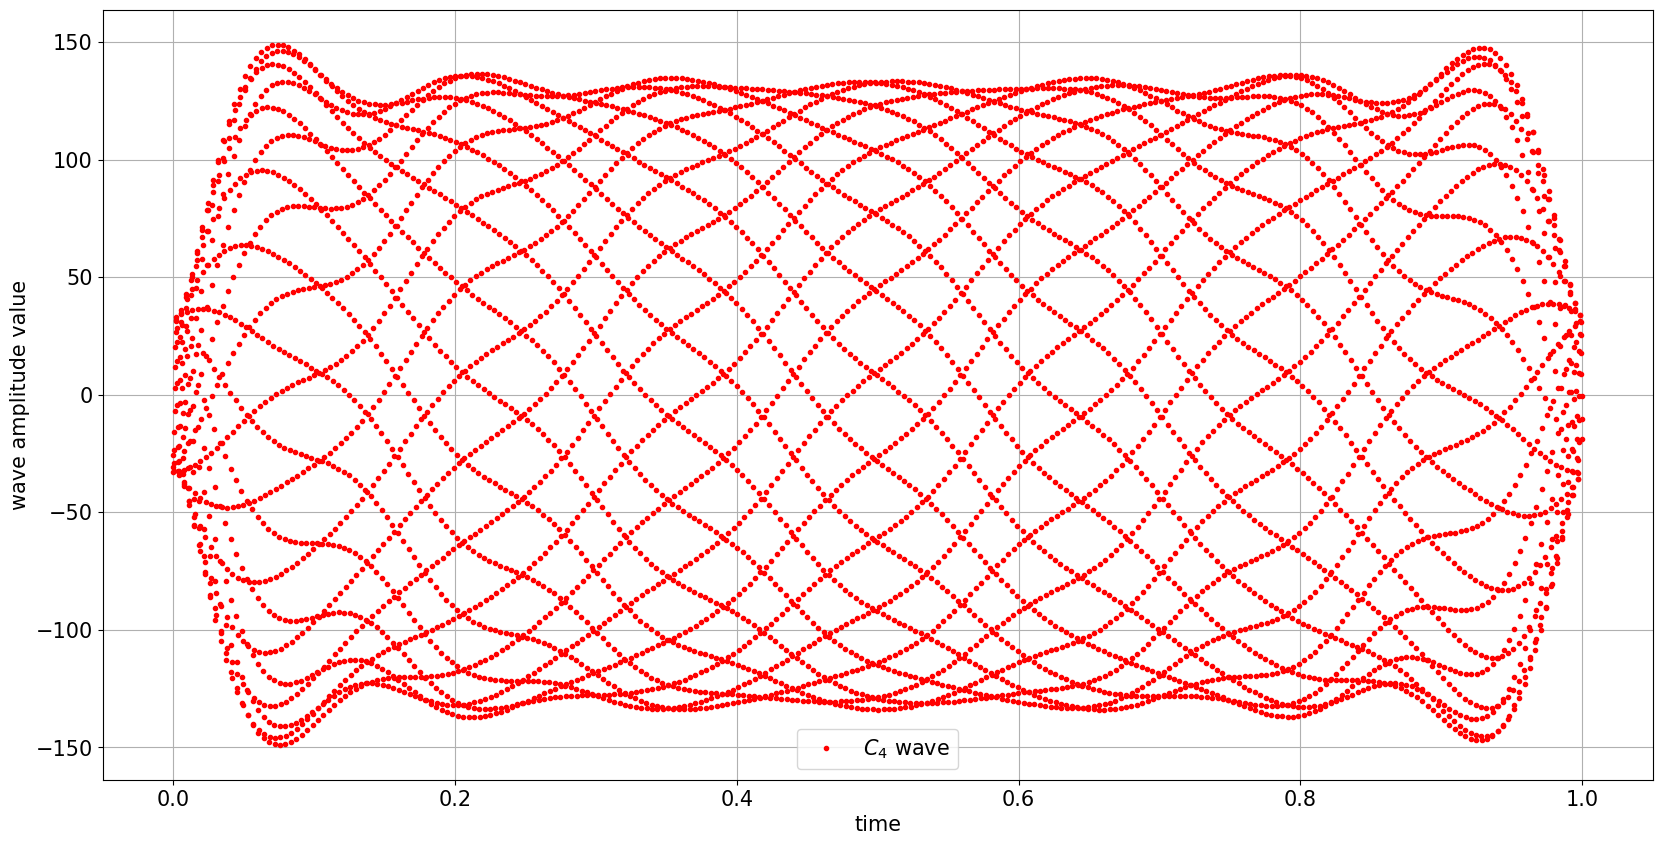

In [55]:
filtered_wave1 = Filter(1)
#x = np.linspace(0, time, len(filtered_wave1))
plt.figure(figsize = (20, 10))
plt.plot(time, filtered_wave1, '.r', label = '$C_4$ wave')
plt.legend()
plt.grid()
plt.xlabel("time")
plt.ylabel("wave amplitude value")
plt.savefig("wave_amp_C4.pdf")

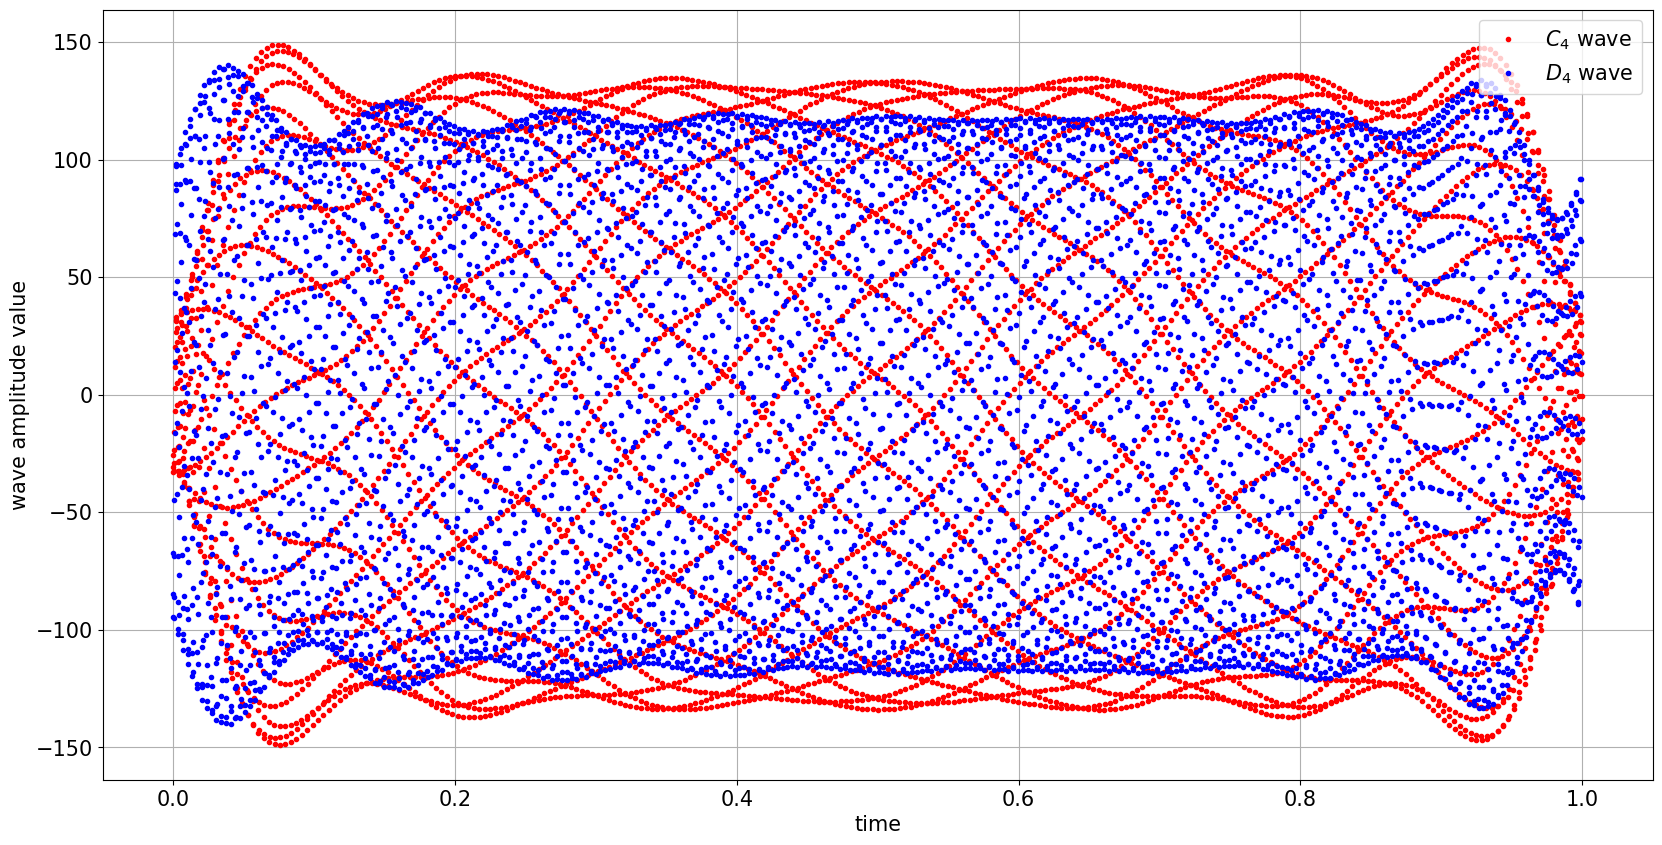

In [54]:
filtered_wave1 = Filter(1)
filtered_wave3 = Filter(3)
#x = np.linspace(0, time, len(filtered_wave1))
plt.figure(figsize = (20, 10))
plt.plot(time, filtered_wave1, '.r', label = '$C_4$ wave')
plt.plot(time, filtered_wave3, '.b', label = '$D_4$ wave')
plt.legend()
plt.grid()
plt.xlabel("time")
plt.ylabel("wave amplitude value")
plt.savefig("wave_amp_C4+D4.pdf")

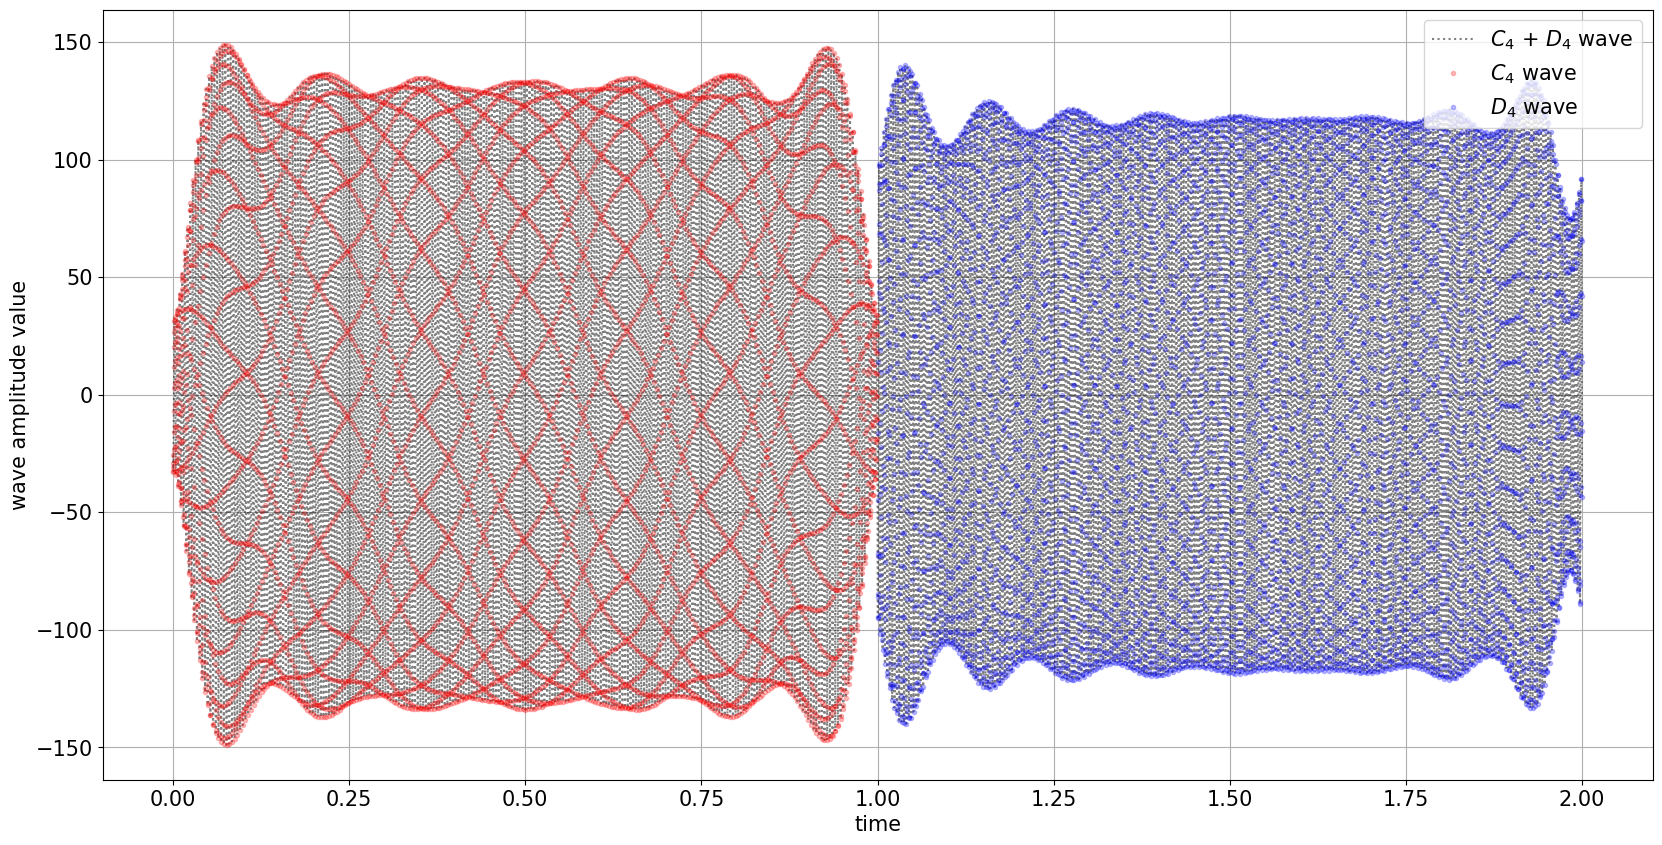

In [53]:
filtered_wave1 = Filter(1)
filtered_wave3 = Filter(3)

filtered_wave_sum = np.concatenate((filtered_wave1, filtered_wave3), axis = 0)

# time
x_sum = np.linspace(0, 2 * max_time, 2 * (sampling_frequency * max_time + 1) - 1)[:-1]
x_C4 = time
x_D4 = np.linspace(1, 2, (sampling_frequency * max_time))

# plot C4 + D4
plt.figure(figsize = (20, 10))
plt.plot(x_sum, filtered_wave_sum, ':k', label = '$C_4$ + $D_4$ wave', alpha = 0.5) 
plt.plot(x_C4, filtered_wave1, '.r', label = '$C_4$ wave', alpha = 0.25)
plt.plot(x_D4, filtered_wave3, '.b',  label = '$D_4$ wave',
         alpha = 0.25)
plt.legend()
plt.grid()
plt.xlabel("time")
plt.ylabel("wave amplitude value")
plt.savefig("wave_amp_independence.pdf")
Audio(filtered_wave_sum, rate=sampling_frequency)

In [36]:
C4toC5 = ["C4", "D4", "E4","F4", "G4", "A4", "B4", "C5",]

def Filter(index):
        freq_cut1 = 0.5 * (frequency[index] + frequency[index + 1])
        freq_cut2 = 0.5 * (frequency[index - 1] + frequency[index])
        indices1 = np.abs(fj) > freq_cut1
        indices2 = np.abs(fj) < freq_cut2
        filtered_Wj = Wj.copy()
        filtered_Wj[indices1,] *= 0
        filtered_Wj[indices2,] *= 0   
        return fft.ifft(filtered_Wj).real

# array box
filtered_wave_sum = np.zeros(1)

# filtered code put in box
for code in C4toC5:
    index = [i for i, n in enumerate(note) if n == code][0]

    # Filtering 
    filtered_wave = Filter(index)
    filtered_wave_sum = np.concatenate((filtered_wave_sum, filtered_wave), axis = 0)

Audio(filtered_wave_sum, rate=sampling_frequency)
# 쉽게 정리하면 일반적으로 그냥 wave 파동을 더하게 되면 음이 합쳐지고 따로 나오지는 않는다.
# 왜냐하면 Audio 라이브러리는 wave 파동을 하나의 어레이로 읽는다. 파동은 합치면 그저 음이 더해질 뿐이다.
# 즉, 우리가 원하는 따로따로의 wave 소리를 내기 위해서는, 그 음을 먼저 어레이를 수평적으로 더해주어야 한다.
# 쉽게 설명하면, a 라는 사운드에 b 라는 사운드를 붙이려면 a + b를 해버리면, 수직적으로 파동이 더해지게 되면서
# 음이 합쳐지게 된다. 파동 자체에 변화를 주기 때문이다.
# 따라서, 파동 자체에 영향을 주지 않으면서 시간을 늘리고 파동을 연장시키려면, a array 끝에 b arrray가 붙으면 된다.
# 이를 concatenate를 이용하면 쉽게 구현할 수 있다.